In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y= True, as_frame=False)
X.shape

/Users/abhishekthamatam/miniforge3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

In [4]:
import numpy as np
y = np.array([int(a) for a in y])
y

array([5, 0, 4, ..., 4, 5, 6])

Constructing the images of MNIST

In [6]:
import matplotlib.pyplot as plt
def digit_image(sample):
    image = X[sample].reshape(28,28)
    fig = plt.figure
    plt.imshow(image, cmap = 'gray_r')
    plt.show()
    digit = 'Digit Class is: %s' %(y[sample])
    return print(digit)

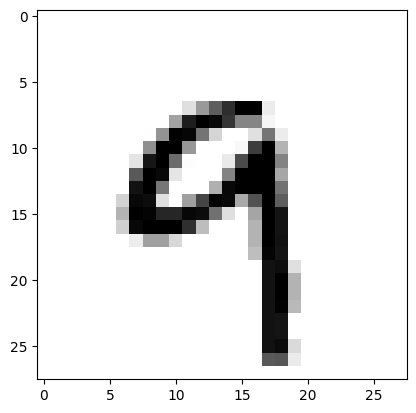

Digit Class is: 9


In [7]:
digit_image(932)

how digits are distributed in the first 10000 MNIST images

In [8]:
cnt = 0
for j in range(10):
    z = [1 if a==j else 0 for a in y[:10000]]
    cnt += sum(z)
    print('The number of digit %d in the subset is: %d' %(j, sum(z)))
print('Total number of instances in the subset: ', cnt)

The number of digit 0 in the subset is: 1001
The number of digit 1 in the subset is: 1127
The number of digit 2 in the subset is: 991
The number of digit 3 in the subset is: 1032
The number of digit 4 in the subset is: 980
The number of digit 5 in the subset is: 863
The number of digit 6 in the subset is: 1014
The number of digit 7 in the subset is: 1070
The number of digit 8 in the subset is: 944
The number of digit 9 in the subset is: 978
Total number of instances in the subset:  10000


we are dealing with a fairly balanced classification problem.

In [10]:
from sklearn.model_selection import train_test_split

XX = X[:10000]
yy = y[:10000]

X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3, random_state=5)

In [11]:
from sklearn.linear_model import LogisticRegression
import timeit

logreg = LogisticRegression(penalty= None, max_iter=1000)

st = timeit.default_timer()
logreg.fit(X_train, y_train)
end = timeit.default_timer()

print('Training time: %s sec' %(end-st))

Training time: 13.858103709062561 sec


Calculating probabilities of the two classes in train subset

In [12]:
y_train_pred_prob = logreg.predict_proba(X_train)
y_test_pred_prob = logreg.predict_proba(X_test)


print('Train predictions for probabilities:\n\n', y_train_pred_prob[:3],'\n')
print('Test predictions for probabilities:\n\n', y_test_pred_prob[:3])

Train predictions for probabilities:

 [[6.99951379e-294 0.00000000e+000 3.16190514e-250 1.00000000e+000
  2.07281351e-228 6.58393768e-139 0.00000000e+000 6.32693187e-136
  6.66773809e-095 6.93458241e-203]
 [4.59702885e-267 5.91112582e-016 4.72827886e-229 2.46937079e-047
  7.08581364e-091 1.64078170e-017 7.22694853e-044 5.63234836e-322
  1.00000000e+000 5.55163553e-160]
 [0.00000000e+000 1.00000000e+000 5.48547852e-147 6.20074925e-176
  1.83617568e-118 0.00000000e+000 3.55026841e-294 1.74902162e-256
  7.90970927e-180 1.52297610e-151]] 

Test predictions for probabilities:

 [[0.00000000e+000 0.00000000e+000 0.00000000e+000 5.14637983e-189
  1.66288021e-226 1.22269393e-278 0.00000000e+000 1.00000000e+000
  1.59855567e-198 7.96001695e-169]
 [1.51248402e-300 0.00000000e+000 1.82428082e-196 0.00000000e+000
  1.00000000e+000 1.71254488e-250 7.81855772e-217 3.67433533e-203
  2.93514478e-226 2.53721600e-093]
 [0.00000000e+000 1.00000000e+000 9.80599667e-121 3.89687575e-098
  1.26017101e-251 1

In [13]:
y_train_pred = y_train_pred_prob.argmax(axis=1) # Finding the predicted classor train predictions
y_test_pred = y_test_pred_prob.argmax(axis=1) 
print('Predicted class for train: ', y_train_pred[:10],'\n')
print('Predicted class for train: ', y_test_pred[:10])

Predicted class for train:  [3 8 1 8 9 1 4 7 3 3] 

Predicted class for train:  [7 4 1 2 8 6 1 9 2 4]


In [14]:
from sklearn import metrics

train_score = metrics.accuracy_score(y_train, y_train_pred) 
test_score = metrics.accuracy_score(y_test, y_test_pred)
print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  1.0 

Test accuracy score of the model is  0.86833


signs of overfitting!

To cure the overfitting, we can regularize the classifier. scikit-learn has an option to easily include a penalty term. Note the hyperparameter C is the inverse of the regularization strength. This means that a high/low value of C induces a weak/strong penalty term.

In [15]:
logreg_pen = LogisticRegression(penalty = 'l2', max_iter = 10000, C=10e-7) #Including a strong L2 penalty import timeit
st = timeit.default_timer()
logreg_pen.fit(X_train, y_train) 
stop = timeit.default_timer()
print('Training time: %s sec' %(stop-st))

Training time: 17.17649425007403 sec


In [16]:
# Finding the predicted class for the train and test subsets
y_train_pred = logreg_pen.predict_proba(X_train).argmax(axis=1)
y_test_pred = logreg_pen.predict_proba(X_test).argmax(axis=1)

In [18]:
train_score = metrics.accuracy_score(y_train, y_train_pred)
test_score = metrics.accuracy_score(y_test, y_test_pred)
print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  0.937 

Test accuracy score of the model is  0.91833


The accuracies now present a much better situation!

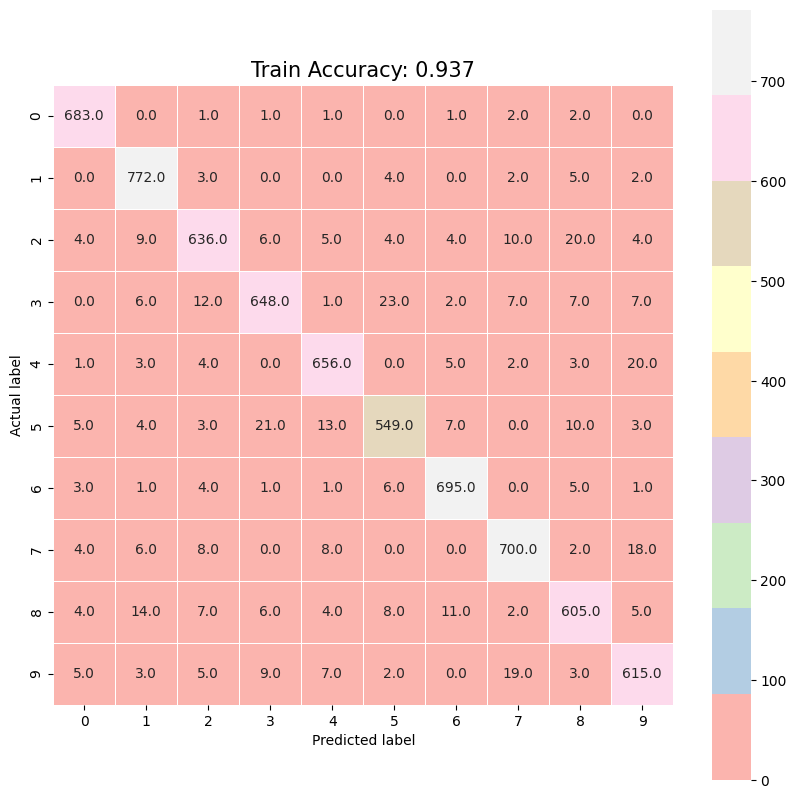

Classification Report for the Train Subset: 

               precision    recall  f1-score   support

           0       0.96      0.99      0.98       691
           1       0.94      0.98      0.96       788
           2       0.93      0.91      0.92       702
           3       0.94      0.91      0.92       713
           4       0.94      0.95      0.94       694
           5       0.92      0.89      0.91       615
           6       0.96      0.97      0.96       717
           7       0.94      0.94      0.94       746
           8       0.91      0.91      0.91       666
           9       0.91      0.92      0.92       668

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

train_c_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10,10))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4)) 
plt.title(all_sample_title, size = 15)
plt.show()

print('Classification Report for the Train Subset: \n\n',classification_report(y_train, y_train_pred))

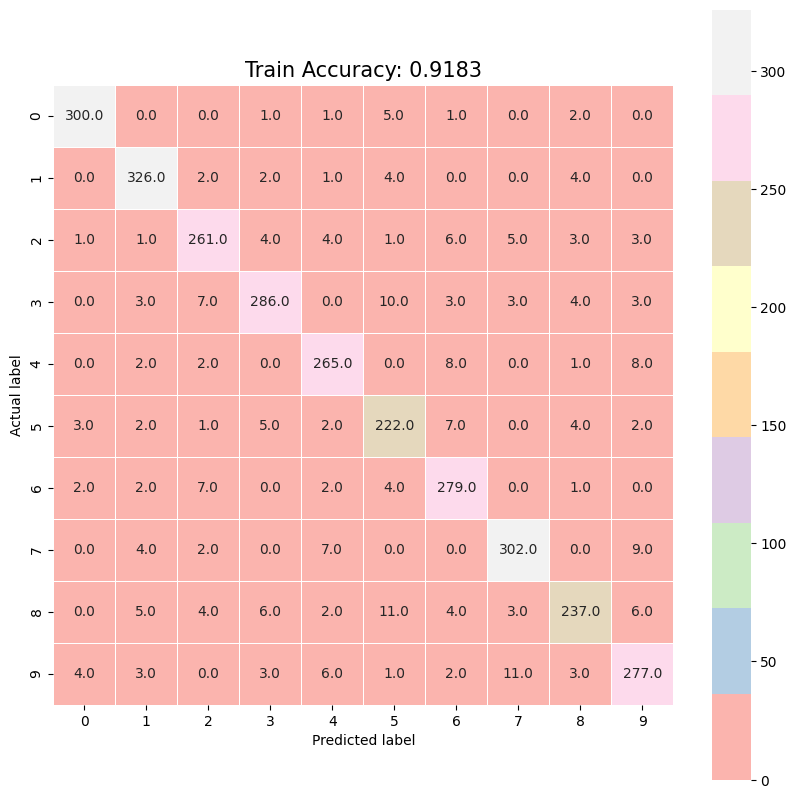

Classification Report for the Train Subset: 

               precision    recall  f1-score   support

           0       0.97      0.97      0.97       310
           1       0.94      0.96      0.95       339
           2       0.91      0.90      0.91       289
           3       0.93      0.90      0.91       319
           4       0.91      0.93      0.92       286
           5       0.86      0.90      0.88       248
           6       0.90      0.94      0.92       297
           7       0.93      0.93      0.93       324
           8       0.92      0.85      0.88       278
           9       0.90      0.89      0.90       310

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

test_c_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,10))
sns.heatmap(test_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Train Accuracy: {0}'.format(round(test_score, 4)) 
plt.title(all_sample_title, size = 15)
plt.show()

print('Classification Report for the Train Subset: \n\n',classification_report(y_test, y_test_pred))